In [9]:
import sys
import os

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [20]:
# read in the data relevant for this figure
def get_sc_data():
    fname = '../processing/talon/sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    df = add_read_annot_metadata(df)
    
    return df

def get_sc_whitelist():
    fname = '../processing/talon/sc_whitelist.csv'
    whitelist = read_whitelist(fname)
    
    return whitelist

def get_sc_bulk_data():
    fname = '../processing/talon/bulk_sc_talon_read_annot.tsv'

    df = pd.read_csv(fname, sep='\t')
    df = add_read_annot_metadata(df, bulk=True)
    
    return df

### Panel 1B

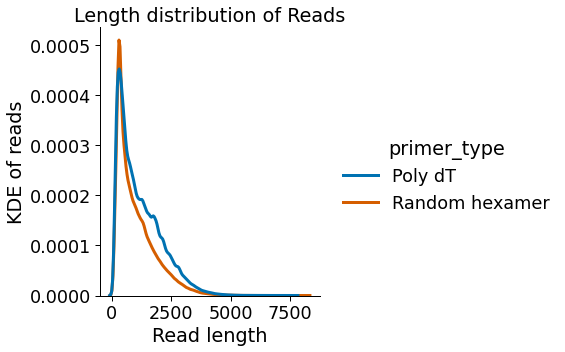

In [11]:
# read in talon read_annot file from sc data
df = get_sc_data()

opref = 'figures/dt_v_randhex'
c_dict, order = get_priming_colors()

plot_read_len_kde(df, 'primer_type', c_dict, order, opref)

### Panel 1C

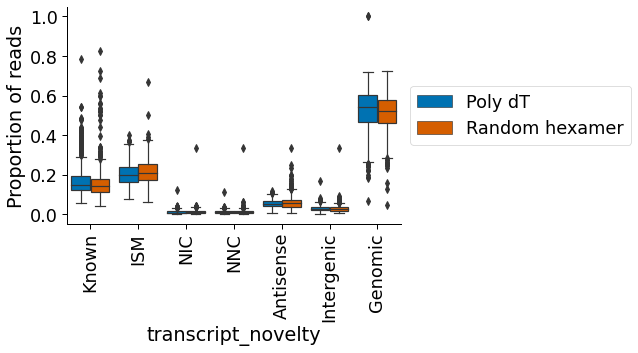

In [12]:
plot_reads_per_cell_nov(df, 'primer_type', c_dict, order, opref)

### Panel 1F

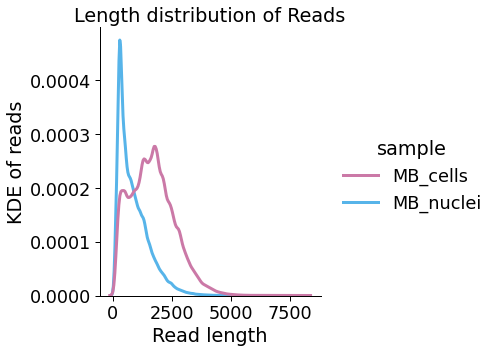

In [13]:
opref = 'figures/cells_v_nuclei'

# remove genomic reads and limit to only MB cells and nuclei
df = df.loc[df['sample'] != 'MT_nuclei']
df = df[df.transcript_novelty!='Genomic']

c_dict, order = get_sample_colors()

plot_read_len_kde(df, 'sample', c_dict, order, opref)

### Panel 1G

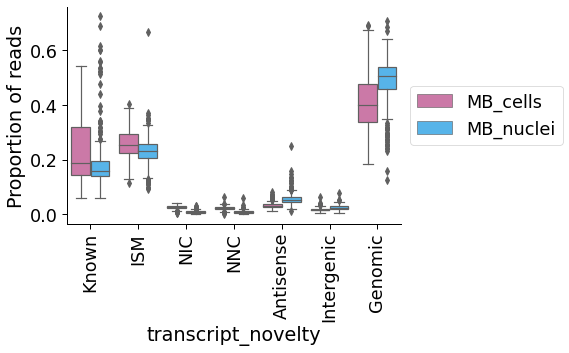

In [15]:
df = get_sc_data()

# limit to only MB cells and nuclei
df = df.loc[df['sample'] != 'MT_nuclei']

plot_reads_per_cell_nov(df, 'sample', c_dict, order, opref)

### Panel 1H

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


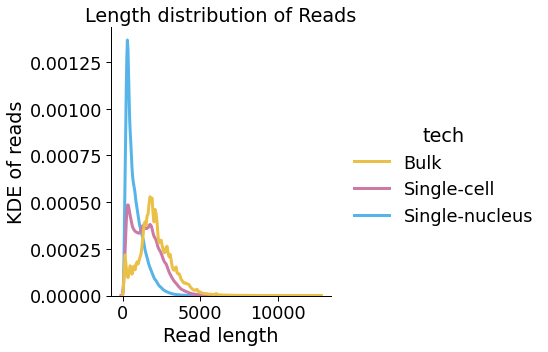

In [16]:
opref = 'figures/bulk_vs_sc'
df = get_sc_bulk_data()

c_dict, order = get_tech_colors()

plot_read_len_kde(df, 'tech', c_dict, order, opref, common_norm=False)

### Panel 1I

  transcript_novelty   counts
0          Antisense   259540
1            Genomic   448898
2                ISM  1102134
3         Intergenic    40109
4              Known  6654958
5                NIC   531944
6                NNC   284313


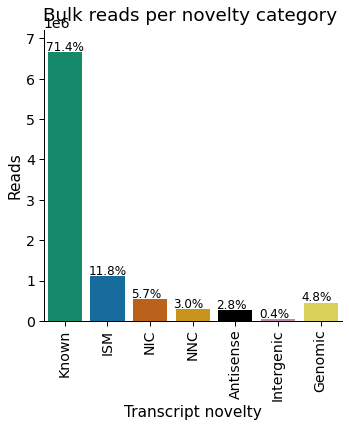

In [17]:
opref = 'figures/bulk'

d = df.loc[df.experiment == 'bulk', 'dataset'].unique().tolist()

c_dict, order = get_talon_nov_colors()

plot_read_novelty(df, opref, c_dict, order, title='Bulk', \
                  datasets=d, ylim=7200000)

### Panel 1J

  transcript_novelty  counts
0          Antisense   70402
1            Genomic  709033
2                ISM  386720
3         Intergenic   25641
4              Known  317621
5                NIC   20503
6                NNC   15492


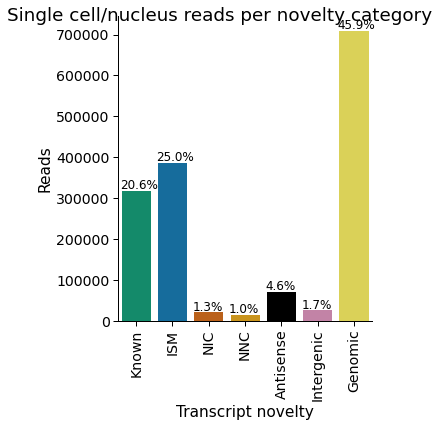

In [18]:
opref = 'figures/sc'

d = df.loc[df.experiment == 'sc', 'dataset'].unique().tolist()

c_dict, order = get_talon_nov_colors()

plot_read_novelty(df, opref, c_dict, order, title='Single cell/nucleus', \
                  datasets=d)

### Panel 1K

In [ ]:
opref = 'figures/sc_filtered'

df = get_sc_data()

whitelist = get_sc_whitelist()

c_dict, order = get_talon_nov_colors()

plot_transcript_novelty(df, opref, c_dict, order, title='Filtered',
                        whitelist=whitelist, ylim=27000)